```
Topic:    Challenge Set 6
Subject:  Linear Regression and Learning Curve
Date:     02/07/2017
Name:     Prashant Tatineni
```

In [368]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.cross_validation import train_test_split

%matplotlib inline

**Challenge 1**

In [105]:
np.random.seed(4444)
x = range(1,51)
y = 10 + 2*np.log(x) + np.random.normal(0,1,50)

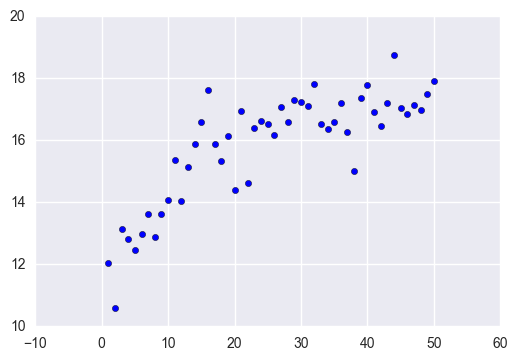

In [106]:
plt.scatter(x,y);

In [112]:
polyX = PolynomialFeatures(2).fit_transform(pd.DataFrame(x))

In [122]:
pr = LinearRegression()
pr.fit(polyX, y)
pr.score(polyX, y)

0.79005637240668647

In [180]:
logX = pd.DataFrame(polyX)

In [184]:
del logX[1]
del logX[2]

In [186]:
logX.columns = ['Intercept']

In [187]:
logX['log_x'] = np.log(x)

In [188]:
logX.head()

,Intercept,log_x
0,1.0,0.000000
1,1.0,0.693147
2,1.0,1.098612
3,1.0,1.386294
4,1.0,1.609438


In [189]:
lr = LinearRegression()
lr.fit(logX, y)
lr.score(logX, y)

0.78784606068107343

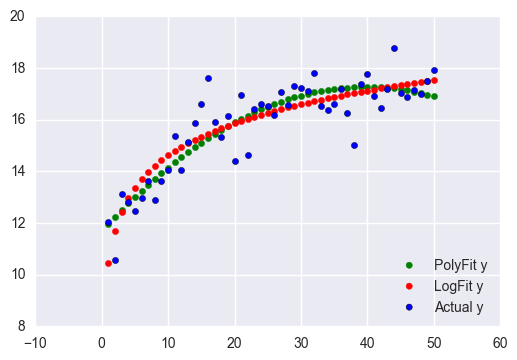

In [221]:
plt.scatter(x, pr.predict(polyX), color='g', label='PolyFit y')
plt.scatter(x, lr.predict(logX), color='r', label='LogFit y')
plt.scatter(x, y, label='Actual y')
plt.legend(loc=4)

**Challenge 2**

In [306]:
np.random.seed(4444)
x = np.linspace(0,1)
y = 1 + 4*x + 2*x**2 + np.random.normal(0,1,50)

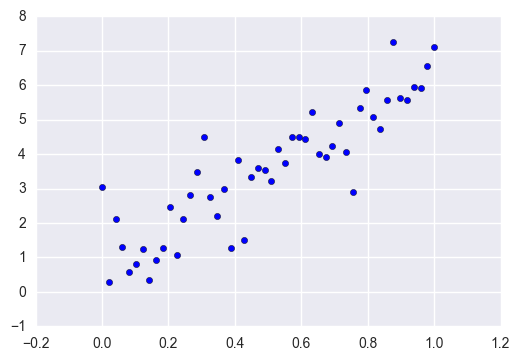

In [307]:
plt.scatter(x,y)

In [308]:
polyX = PolynomialFeatures(2).fit_transform(pd.DataFrame(x))

In [310]:
X_train, X_test, y_train, y_test = train_test_split(polyX, y, test_size=0.3)

In [311]:
pr = LinearRegression()
pr.fit(X_train, y_train)
y_train_predicted = pr.predict(X_train)
metrics.mean_squared_error(y_train, y_train_predicted)

0.59581843630595122

In [312]:
y_test_predicted = pr.predict(X_test)
metrics.mean_squared_error(y_test, y_test_predicted)

0.93808385044322384

**Challenge 3**

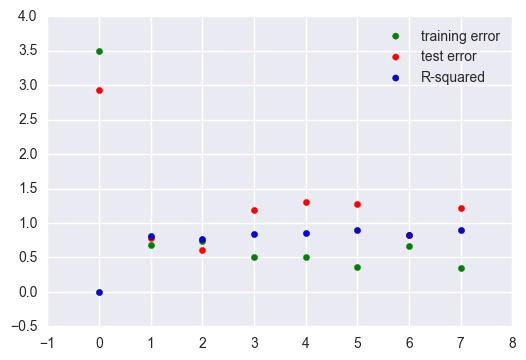

In [347]:
degree = range(8)
training_error = []
test_error = []
R_squared = []
AIC = []

for i in degree:
    polyX = PolynomialFeatures(i).fit_transform(pd.DataFrame(x))
    X_train, X_test, y_train, y_test = train_test_split(polyX, y, test_size=0.3)
    model = sm.OLS(y_train, X_train)
    fit = model.fit()
    y_train_predicted = fit.predict(X_train)
    training_error.append(metrics.mean_squared_error(y_train, y_train_predicted))
    y_test_predicted = fit.predict(X_test)
    test_error.append(metrics.mean_squared_error(y_test, y_test_predicted))
    R_squared.append(fit.rsquared)
    AIC.append(fit.aic)

plt.scatter(degree, training_error, color='g', label='training error')
plt.scatter(degree, test_error, color='r', label='test error')
plt.scatter(degree, R_squared, label='R-squared')
plt.legend()

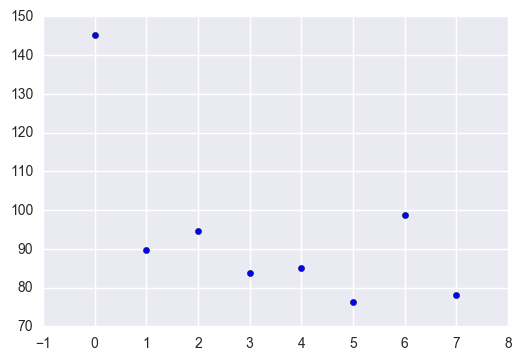

In [349]:
plt.scatter(degree, AIC);

**Challenge 4**

In [350]:
polyX = PolynomialFeatures(2).fit_transform(pd.DataFrame(x))
X_train, X_test, y_train, y_test = train_test_split(polyX, y, test_size=0.3)

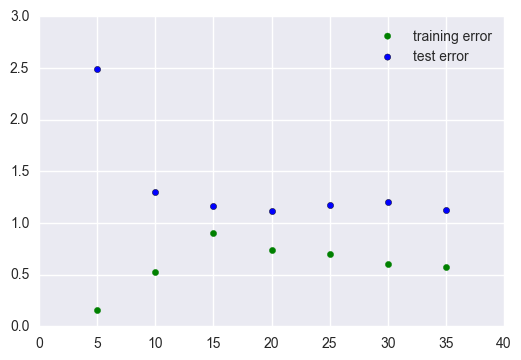

In [367]:
ms = [5,10,15,20,25,30,35]
training_error = []
test_error = []

for m in ms:
    model = sm.OLS(y_train[0:m], X_train[0:m])
    fit = model.fit()
    y_train_predicted = fit.predict(X_train[0:m])
    training_error.append(metrics.mean_squared_error(y_train[0:m], y_train_predicted))
    y_test_predicted = fit.predict(X_test)
    test_error.append(metrics.mean_squared_error(y_test, y_test_predicted))

plt.scatter(ms, training_error, color='g', label='training error')
plt.scatter(ms, test_error, label='test error')
plt.legend()